In [99]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [100]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i #current ratio like x/1 multiplied by new ratio ex : x/2 = x^2/2 ... x*(n)/ n!
        r=2*eps*rn.random()-eps #adjusts/wrongs the ratio according to esp=error
        y+=b*(1.+r) #current result + new ratio  ex : (x/1! +x**2/ 2!) + x**3 / 3!
    return y 

In [101]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist # returns list of results not just one result

In [102]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy # returns list of results

In [103]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy #array of results

In [104]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

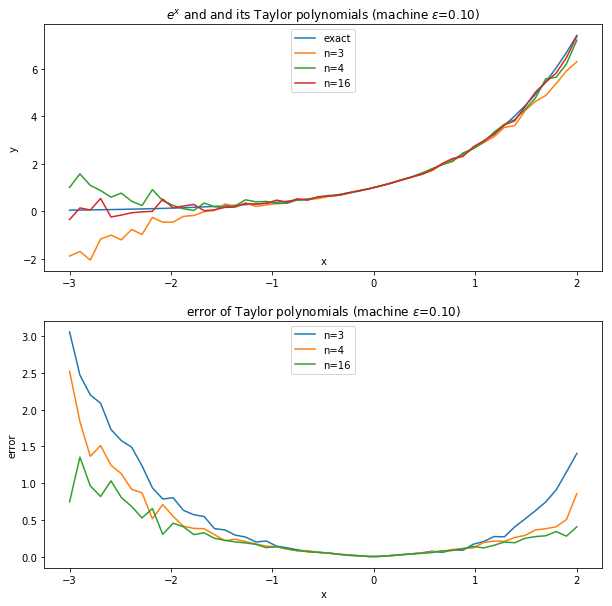

In [105]:
xlist = np.linspace(-3, 2, 50) # this creates list of 50 points st equidistant and btw -3 and 2 
nlist = [3,4,16] #### original 3,4,16
eps=.1
kmax=30 # Im not sure what this does exactly

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact') #plots what we consider to be the true value of e**x ie eps=0
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n) 
    #plots approximation up to deg=n for each value of x with fixed eps
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))#calculates abs err btw e**x and approximation with eps fixed
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps)) #repeat previous
        y=np.maximum(y,z)# to keep the maximum error
    ax2.plot(xlist,y,label='n=%d'%n)# plot error curve for eps fixed at different values of x

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps) #graph setup stuff -no math relevance
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

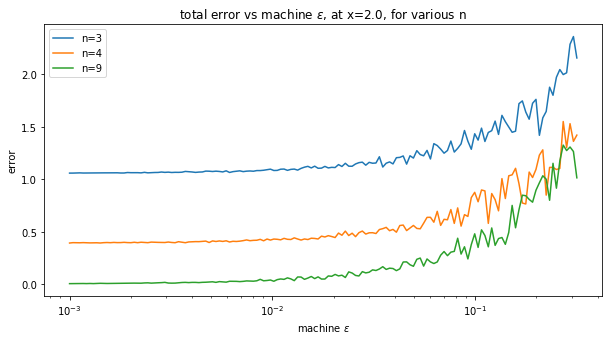

In [106]:
nlist = [3,4,9] 
elist = np.logspace(-3, -.5, 150) #similar to np.linspace
x=2.
kmax=20 # still not sure why we had to do this, is it so we are sure we don't underestimate the error ?

plt.figure(figsize=(10,5))
for n in nlist: #up until each n in the list
    y=np.abs(errelist(n,x,elist)) #computes difference btw e**x and approximation with eps variable
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z) # I think this tries to find a greatest upper bound for the error
    plt.plot(elist,y,label='n=%d'%n) #plots err btw e**x and approximation until deg=n

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

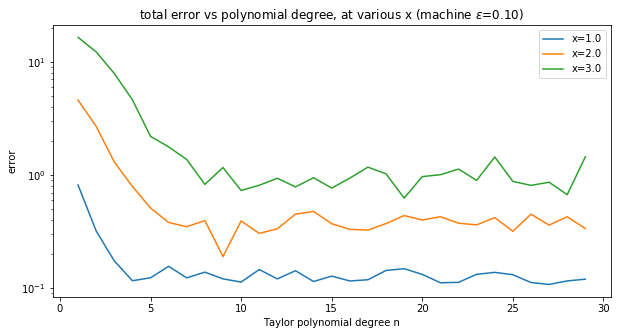

In [107]:
xlist = [1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps)) #computes Tn(x) for each x in the list and for all n btw 1 and 30, fix eps
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

Question 2 : From  the "error vs n" plot we see that after a certain point increasing n does not imporve the total accuracy anymore. Investigate experimentally how this threshold depends on x and eps.


So if we consider that last diagram ("error vs n") then we see that for all n bigger than 5 the error stops decreasing and just fluctuates and there eps=.1.

We can see in the "error vs eps" diagram that for n=9 and eps=.1, the error is around 0.3. Then if we change then preset nlist to nlist = [ 15, 20 ,15 ] we get than the error with eps=0.1 stay between 0.2 and 0.4 no matter what n is. Thus increasing n cannot improve the accuracy indefinitely, we also need to minimize eps.

Also, if we look at "error vs x" diagram, we can change the settings to go up to x=3 and we see that with eps=.1 and n=16, the error is at least 0.4-0.5. for x between 1 and 3. Now if we look at the same diagram but with n up to 20, 25 30, we see that the error changes according to x. If x=1 err is around 0.2, x=2 err is btw 0.3 and 0.5, if x=3 then err can be as high as 1. Thus no matter how far we compute Tn(x), we would need to minimize eps drastically in order to get very high accuracy for large values of x.


Question 3 : Modify the code to study the relative error instead of the absolute error. Explain the observed behavior.

See code in cell below. Changes are explained in #comments.

Observation : We see that for x negative, the relative error really blows up. That is probaly due to the fact that the value of e^x gets really small and since we are dividing by it, it amplifies the absolute error. However for large value of x we can see that the relative error gets really small , which makes sense since then e^x grows exponentially fast so dividing by it minimizes the absolute error (that is still techincally increase along with x by graph 1) ).


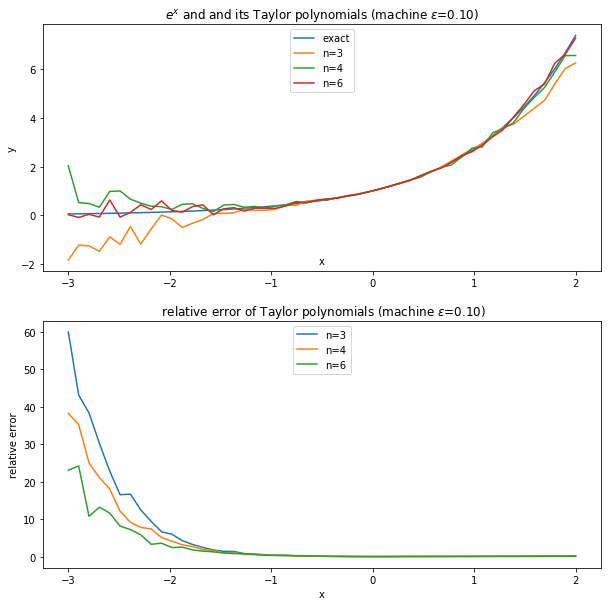

In [108]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,6] 
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n) 
plt.legend()
for n in nlist: 
    absolue=np.abs(errxlist(n,xlist,eps))#calculates abs err btw e**x and approximation with eps fixed
    y=absolue/(np.exp(xlist))#calculates relative error 
    for k in range(1,kmax):
        absoluetemp=np.abs(errxlist(n,xlist,eps))#repeat previous
        z=absoluetemp/(np.exp(xlist))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)# plot error curve for eps fixed at different values of x

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r' relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps) 
ax2.set_xlabel('x')
ax2.set_ylabel('relative error')
ax2.legend(loc="upper center")
plt.show()

Question 4 : Pick you favorite transcendental function and modify the given code accordingly for its computation. Repeat the preceding 2 items.

Pick f(x)=sin(x).

See code in the cells below.

Part 1 : Investigate how the accuracy changes when changes are made to n, x and eps.

    First we note that since sin(x) is zero for all x equivalent to kpi, we are expecting cancellation of digits around these nodes and thus lower accuracy.

After looking at the "error vs n" graph we can see that after two iterations, 2n+1>3 then the error stops decreasing and fluctuates. However we can see that it becomes really small if x gets closer to zero, or away from pi, whcih was expected given the cancellation of digits inherent to sin(x) at x=pi. Also, we can see from the "err vs eps" graph that as long as eps is less than 0.01  the error is less than 0.05. It appears that the variable that has the greatest effet on accuracy here is the value of x. 

Part 2 : See relative error in last cell. 

Observations : We see from the "relative error" graph that as long as x is between -pi and pi, the realtive error is really small so the accuracy is satisfactory. However, if we get close to pi, we see a peak, meaning our approximation is totally off there. Also if x gets out of that (-pi,pi) interval, well the results are simply wrog, which might be a problem of implementation. But it also makes sense that the series would take longer to converge for large values so x, so if we try to look at the relative error for n=30, we see that we get values that are more clustered, but who still oscillate wildly. Thus we conclude that for higher accuracy it is better to restrict the argument of sin(x) to the interval (-pi,pi).
    

In [109]:
def sinser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for sin
# n - number of iterations - made a change here because for sin(x) the exponent needs to be odd
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
# sgn - sign of the new term since alternating series
    sgn=-1.
    b=1.
    b*=np.power(sgn,0)*x
    y=b
    if n>0 :
        for i in range(1,n):
            b*=float(sgn*x*x/((2*i)*(2*i+1))) #current ratio like x/1 multiplied by new ratio 
            #ex : - x**2/2*3 = - x^3/1*2*3 ... (-1)**n * x**(2n+1)/ (2n+1)!
            r=2*eps*rn.random()-eps #adjusts/wrongs the ratio according to esp=error
            y+=b*(1.+r) #current result + new ratio  ex : (x/1! +x**2/ 2!) + x**3 / 3!
    return y 

In [110]:
def sinserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(sinser(n,x,eps))
    return ylist 

In [111]:
def errsinxlist(n,xlist,eps):
#difference between Tn(x) and sin(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy # returns list of results

In [112]:
def errsinelist(n,x,elist):
#difference between Tn(x) and sin(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy #array of results

In [113]:
def errsinnlist(nlist,x,eps):
#difference between Tn(x) and sin(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

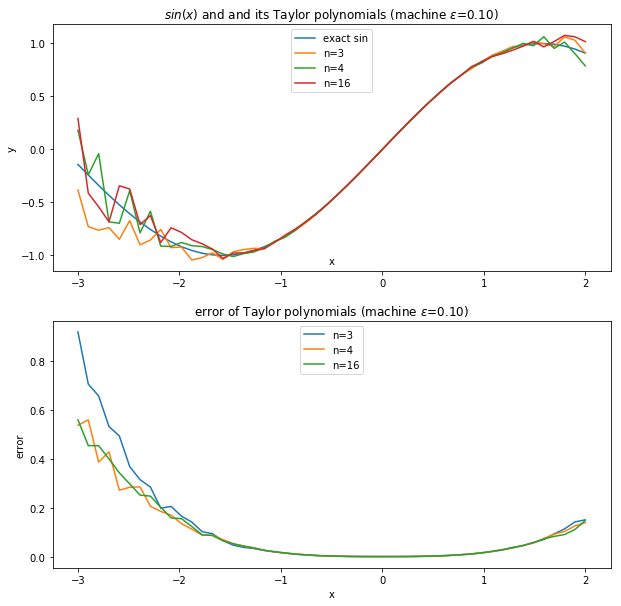

In [114]:
xlist = np.linspace(-3, 2, 50) # this creates list of 50 points st equidistant and btw -3 and 2 
nlist = [3,4,16] #### original 3,4,16
eps=.1
kmax=30 # Im not sure what this does exactly

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact sin') #plots what we consider to be the true value of e**x ie eps=0
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n) 
    #plots approximation up to deg=n for each value of x with fixed eps
plt.legend()
for n in nlist: 
    y=np.abs(errsinxlist(n,xlist,eps))#calculates abs err btw e**x and approximation with eps fixed
    for k in range(1,kmax):
        z=np.abs(errsinxlist(n,xlist,eps)) #repeat previous
        y=np.maximum(y,z)# to keep the maximum error
    ax2.plot(xlist,y,label='n=%d'%n)# plot error curve for eps fixed at different values of x

ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps) #graph setup stuff -no math relevance
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

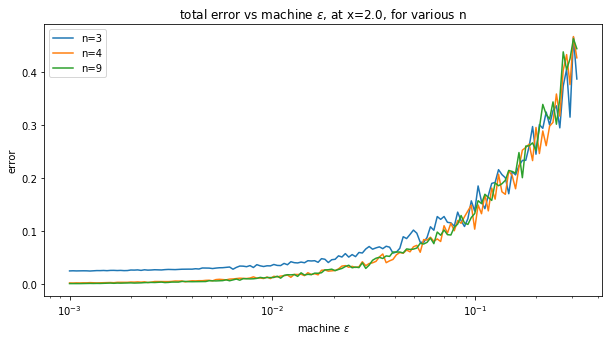

In [115]:
nlist = [3,4,9] 
elist = np.logspace(-3, -.5, 150) #similar to np.linspace
x=2.
kmax=20 # still not sure why we had to do this, is it so we are sure we don't underestimate the error ?

plt.figure(figsize=(10,5))
for n in nlist: #up until each n in the list
    y=np.abs(errsinelist(n,x,elist)) #computes difference btw e**x and approximation with eps variable
    for k in range(1,kmax):
        z=np.abs(errsinelist(n,x,elist))
        y=np.maximum(y,z) # I think this tries to find a greatest upper bound for the error
    plt.plot(elist,y,label='n=%d'%n) #plots err btw e**x and approximation until deg=n

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

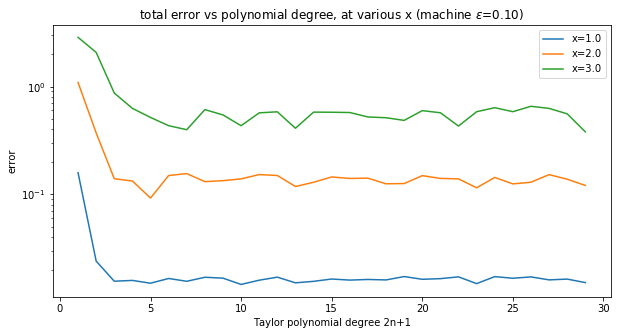

In [116]:
xlist = [1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errsinnlist(nlist,x,eps)) #computes Tn(x) for each x in the list and for all n btw 1 and 30, fix eps
    for k in range(1,kmax):
        z=np.abs(errsinnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree 2n+1')
plt.ylabel('error')
plt.legend()
plt.show()

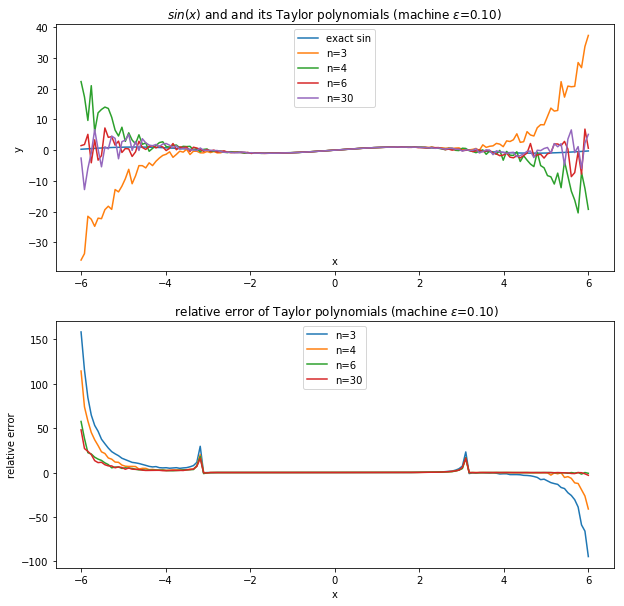

In [118]:
xlist = np.linspace(-6, 6, 150) #modified focus since we are interested in behavior around nodes
nlist = [3,4,6,30] 
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact sin')
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n) 
plt.legend()
for n in nlist: 
    absolue=np.abs(errsinxlist(n,xlist,eps))#calculates abs err btw e**x and approximation with eps fixed
    y=absolue/(np.sin(xlist))#calculates relative error 
    for k in range(1,kmax):
        absoluetemp=np.abs(errsinxlist(n,xlist,eps))#repeat previous
        z=absoluetemp/(np.sin(xlist))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)# plot error curve for eps fixed at different values of x

ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r' relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps) 
ax2.set_xlabel('x')
ax2.set_ylabel('relative error')
ax2.legend(loc="upper center")
plt.show()